In [1]:
import matplotlib.pyplot as plot
import numpy
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg
%matplotlib inline

Якобиан $Q(\omega)$ выглядит следующим образом:
$
(\bigtriangledown{Q})_j=\sum\limits_{i=1}^m\frac{y_i x_i^j \exp{(y_i<x_i,\omega>)}}{1 + \exp{(y_i<x_i, \omega>)}}
$.
Воспользуемся методом градиентного спуска.

In [2]:
class Point:
    def __init__(self, y, point):
        self.y = y
        self.point = numpy.concatenate([[-1], point], 0)
    
    def get_n(self):
        return len(self.point) - 1

In [3]:
def grad(w, points):
    result = []
    n = points[0].get_n()
    for j in range(n + 1):
        sum = 0
        for i in range(len(points)):
            exp = numpy.exp(points[i].y * numpy.sum([points[i].point[k] * w[k] for k in range(n + 1)]))
            sum += points[i].y * points[i].point[j] * exp / (1 + exp)
        result.append(sum)
    return numpy.array(result)

In [4]:
def draw_points(points):
    if (points[0].get_n() == 2):
        for point in points:
            if point.y == 1:
                plot.scatter(point.point[1], point.point[2], color="red")
            else:
                plot.scatter(point.point[1], point.point[2], color="blue")
    else:
        for point in points:
            if point.y == 1:
                axis.scatter(point.point[1], point.point[2], point.point[3], color="red")
            else:
                axis.scatter(point.point[1], point.point[2], point.point[3], color="blue")

In [5]:
def Q(w, points):
    n = points[0].get_n()
    sum = 0
    for i in range(len(points)):
        exp = numpy.exp(-points[i].y * numpy.sum([points[i].point[k] * w[k] for k in range(n + 1)]))
        sum += numpy.log(1 + exp)
    return sum

epsilon = 0.001
k_max = 1000
def grad_descent(points, initial_omega):
    n = points[0].get_n()
    w = numpy.array(initial_omega)
    
    step = 1
    steps = 0
    for i in range(k_max):
        w_old = w.copy()
        w = numpy.array(w - step * grad(w, points))
        if linalg.norm(w - w_old, numpy.inf) < epsilon:
            break
        steps += 1
    return w, steps

def grad_descent_non_constant_h(points, initial_omega):
    n = points[0].get_n()
    w = numpy.array(initial_omega)
    
    steps = 0
    step = 1
    for i in range(k_max):
        w_old = w.copy()
        w = numpy.array(w - step * grad(w, points))
        if Q(w, points) <= Q(w_old, points) - step * numpy.linalg.norm(grad(w, points), 2) / 2:
            step = 1
        else:
            w = w_old.copy()
            step /= 2
        
        if linalg.norm(w - w_old, numpy.inf) < epsilon:
            break
        steps += 1
    return w, steps

In [6]:
class Line2d:
    # Ax+By+C=0
    def __init__(self, A, B, C):
        self.A = A
        self.B = B
        self.C = C

    def draw(self, x_min, x_max, y_min, y_max, in_color):
        if self.B != 0:
            x = numpy.linspace(x_min, x_max, 2)
            plot.plot(x, (lambda x: - (self.A * x - self.C) / self.B)(x), color=in_color)
        else:
            plot.plot([-self.C / self.A, -self.C / self.A], [y_min, y_max], color=in_color)

def make_line_2d(omega):
    return Line2d(omega[1], omega[2], -omega[0])

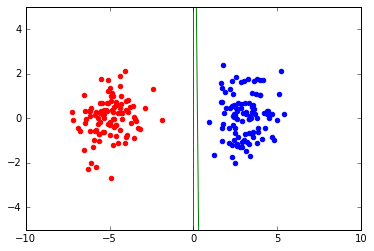

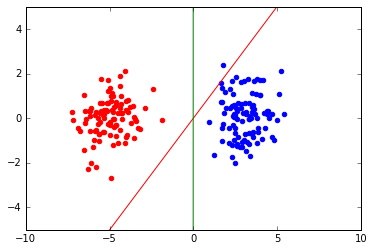

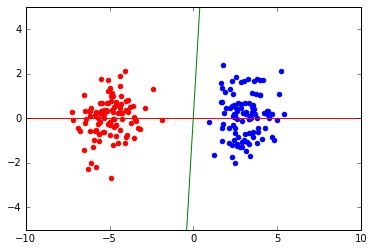

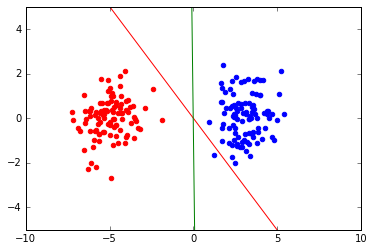

In [7]:
N = 100
shared_points = [Point(1, numpy.array([numpy.random.normal(-5, 1, 1)[0], numpy.random.normal(0, 1, 1)[0]])) for i in range(N)]
shared_points.extend([Point(-1, numpy.array([numpy.random.normal(3, 1, 1)[0], numpy.random.normal(0, 1, 1)[0]])) for i in range(N)])
initial_omegas = [[0, 1, 0], [0, -1, 1], [0, 0, 1], [0, -1, -1]]
omegas = [grad_descent(shared_points, omega)[0] for omega in initial_omegas]

for initial_omega, omega in zip(initial_omegas, omegas):
    plot.figure()
    make_line_2d(initial_omega).draw(-10, 10, -5, 5, "red")
    make_line_2d(omega).draw(-10, 10, -5, 5, "green")
    draw_points(shared_points)
    axis = plot.gca()
    axis.set_ylim(-5, 5)
    axis.set_xlim(-10, 10)

plot.show()

На рисунках отмечены 2 класса точек. Начальное приближение разделяющией прямой изображено красным цветом, а результирующая прямая зеленым.

In [8]:
class Plane:
    # Ax+By+Cz+D=0
    def __init__(self, A, B, C, D):
        self.A = A
        self.B = B
        self.C = C
        self.D = D
    
    def draw(self, in_color):
        if self.C != 0:
            def z(x, y):
                return -(self.A * x + self.B * y) / self.C
            grid = numpy.mgrid[-2:4:1, -2:4:1]
            axis.plot_wireframe(grid[0], grid[1], z(grid[0], grid[1]), color=in_color)
            

def make_plane(w):
    return Plane(w[1], w[2], w[3], -w[0])

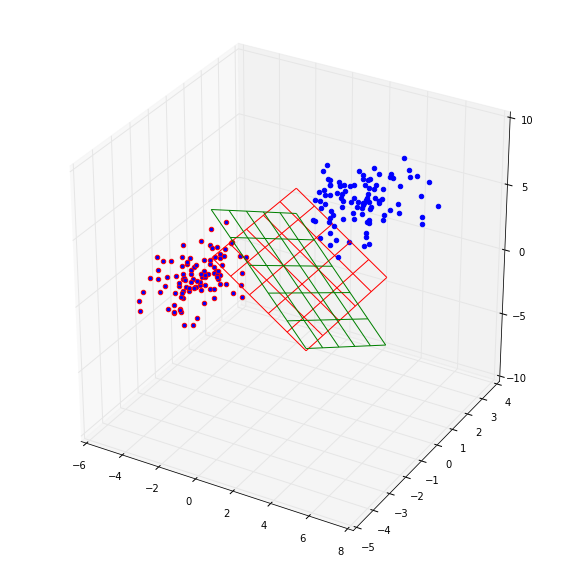

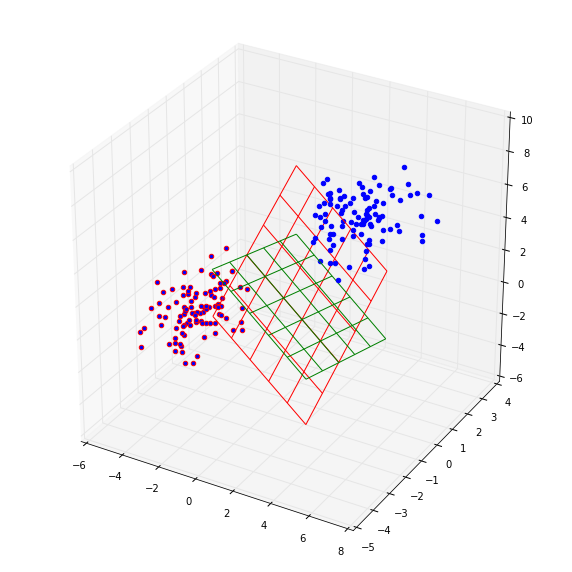

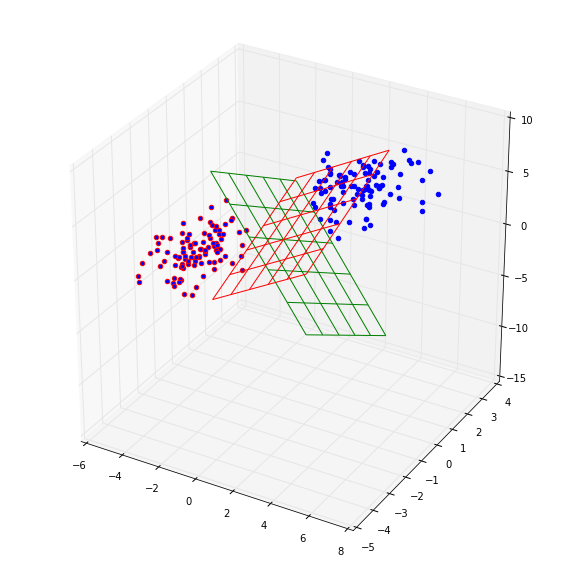

In [9]:
shared_points = [Point(1, numpy.array([numpy.random.normal(-3, 1, 1)[0], numpy.random.normal(-2, 1, 1)[0], numpy.random.normal(0, 1, 1)[0]])) for i in range(N)]
shared_points.extend([Point(-1, numpy.array([numpy.random.normal(3, 1, 1)[0], numpy.random.normal(1, 1, 1)[0], numpy.random.normal(5, 1, 1)[0]])) for i in range(N)])

initial_omegas = [[0, 1, 0, 1], [0, -1, 1, -1], [0, -1, -1, 1]]
omegas = [grad_descent(shared_points, omega)[0] for omega in initial_omegas]

for initial_omega, omega in zip(initial_omegas, omegas):
    figure = plot.figure(figsize=(10, 10))
    axis = figure.gca(projection='3d')
    axis = plot.gca()
    
    make_plane(initial_omega).draw("red")
    make_plane(omega).draw("green")
    draw_points(shared_points)

plot.show()

Снова красным изображается начальное приближение, а зеленым результат.

Построим график зависимости количества итераций алгоритма от требуемой точности $N(\log(1/\varepsilon))$ и сравним его с таким же графиком для метода, в котором шаг меняется на каждой итерации. К сожалению застивить работать реализвцию с меняющимся шагм не успел. Можно посмотреть, только на график для постоянного шага. Для более совершенных методов он должен расти медленее.

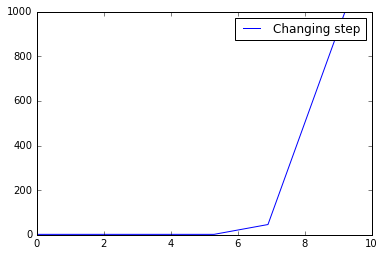

In [10]:
epsilons = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]
N_non_constant = []
N_constant = []
for eps in epsilons:
    epsilon = eps
    #N_non_constant.append(grad_descent_non_constant_h(shared_points, [0, 1, 1, 1])[1])
    N_constant.append(grad_descent(shared_points, [0, 1, 1, 1])[1])

#plot.plot(numpy.log(1 / numpy.array(epsilons)), N_non_constant, label="Changing step")
plot.plot(numpy.log(1 / numpy.array(epsilons)), N_constant, label="Constant step")
axis = plot.gca()
axis.legend()